In [6]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
import ETFunctions as et

## Bring in the data needed

In [7]:
#Bring in surface temperature for each plot and join up
WheatTs = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyTs.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
BeatTs = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyTs.pkl')],axis=1,keys=['Beat'],names=['Crop'])
Ts = pd.concat([WheatTs,BeatTs])

#Bring in air temperature data for each experiment
WheatTa = pd.read_pickle('.\Wheat\DataFrames\DailyTa.pkl')
BeatTa = pd.read_pickle('.\FodderBeat\DataFrames\DailyTa.pkl')
Ta = pd.concat([WheatTa,BeatTa])

#Bring in solar radiation data for each experiment
WheatRs = pd.read_pickle('.\Wheat\DataFrames\DailyRs.pkl')
BeatRs = pd.read_pickle('.\FodderBeat\DataFrames\DailyRs.pkl')
Rs = pd.concat([WheatRs,BeatRs])

#Bring in vapour pressure deficit for each experiment
WheatEd = pd.read_pickle('.\Wheat\DataFrames\DailyEd.pkl')
BeatEd = pd.read_pickle('.\FodderBeat\DataFrames\DailyEd.pkl')
Ed = pd.concat([WheatEd,BeatEd])

#Bring in vapour pressure for each experiment
WheatEo = pd.read_pickle('.\Wheat\DataFrames\DailyEo.pkl')
BeatEo = pd.read_pickle('.\FodderBeat\DataFrames\DailyEo.pkl')
Eo = pd.concat([WheatEo,BeatEo])

#Bring in solar radiatin for each experiment
WheatRn = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyRn.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
BeatRn = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyRn.pkl')],axis=1,keys=['Beat'],names=['Crop'])
Rn = pd.concat([WheatRn,BeatRn])

#Bring in fPAR (estimated from NDVI and interpolated to daily values) for each plot
WheatfPAR = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
BeatfPAR = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Beat'],names =['Crop'])
fPAR = pd.concat([WheatfPAR,BeatfPAR])

#Bring in soil water use data.
WheatWU = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyWU.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
BeatWU = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyWU.pkl')],axis=1,keys=['Beat'],names =['Crop'])
WU = pd.concat([WheatWU,BeatWU])

In [21]:
Crops = Ts.columns.get_level_values(0).drop_duplicates().values
WheatGPs = GH.SetGraphicsPatterns(Ts.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

BeatGPs = GH.SetGraphicsPatterns(Ts.Beat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '250', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '250', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Dryland   0     -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          50    -  purple  0.15   o  purple
Irrigated 0    --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          50   --  purple  0.45   ^   white
Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '300', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '300', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'ora

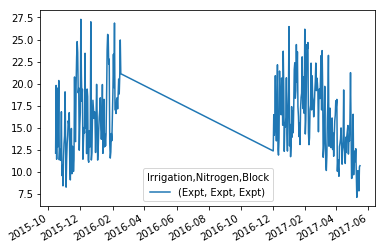

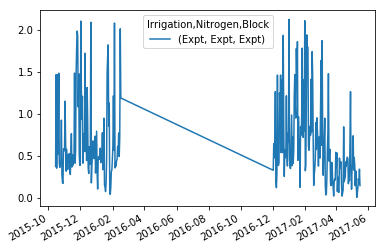

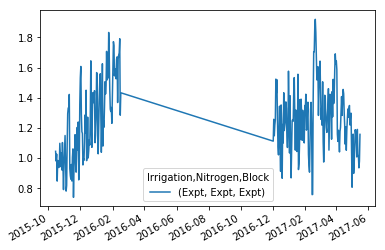

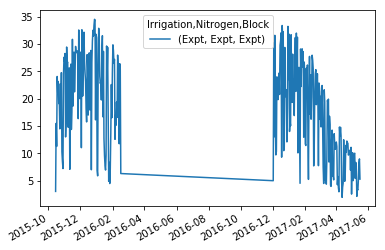

In [9]:
Ta.plot()
Ed.plot()
Eo.plot()
Rs.plot()

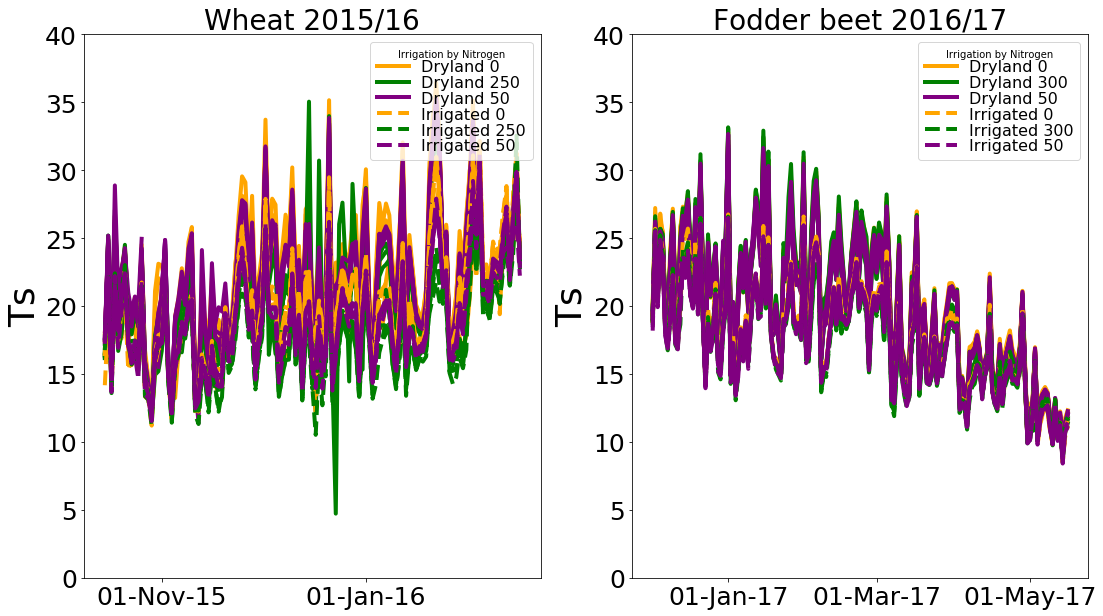

In [10]:
def AddGraphFeatures(Name):
    plt.ylabel('Ts', fontsize=36);
    plt.ylim(0,40)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')


Graph = plt.figure(figsize=(18,10))

ax = Graph.add_subplot(1,2,1)
GH.AddIndexedPlot(Ts.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(1,2,2)
GH.AddIndexedPlot(Ts.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

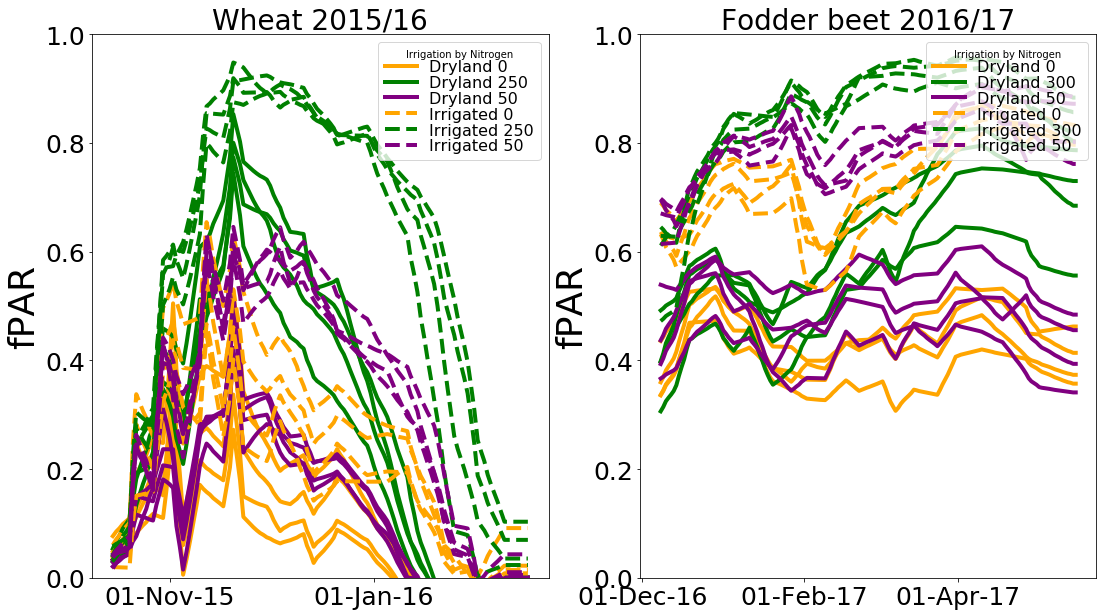

In [11]:
def AddGraphFeatures(Name):
    plt.ylabel('fPAR', fontsize=36);
    plt.ylim(0,1)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')


Graph = plt.figure(figsize=(18,10))

ax = Graph.add_subplot(1,2,1)
GH.AddIndexedPlot(fPAR.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(1,2,2)
GH.AddIndexedPlot(fPAR.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

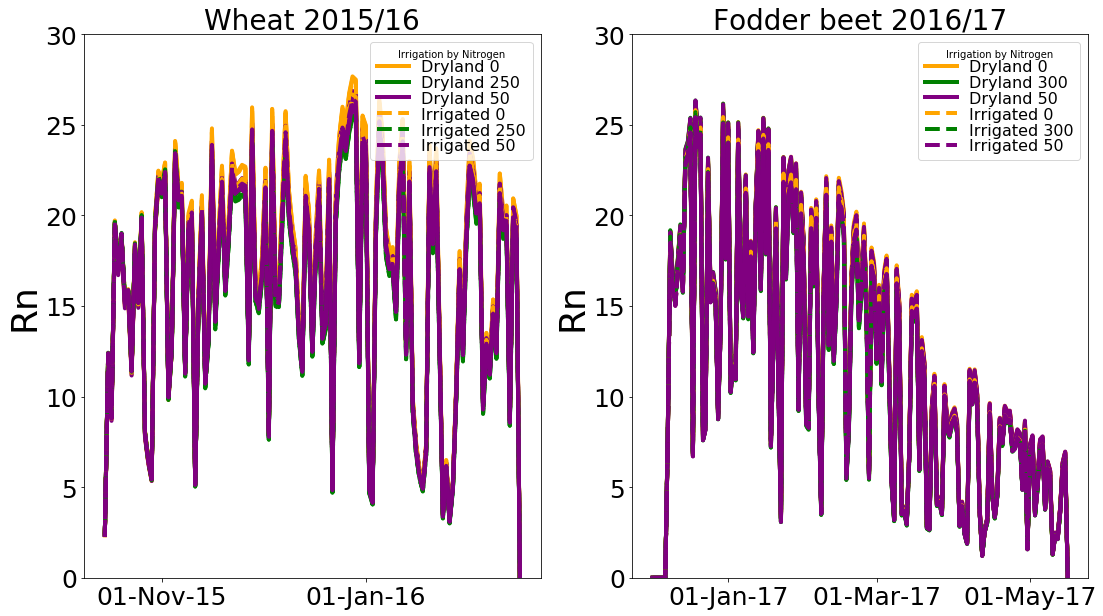

In [12]:
def AddGraphFeatures(Name):
    plt.ylabel('Rn', fontsize=36);
    plt.ylim(0,30)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')


Graph = plt.figure(figsize=(18,10))

ax = Graph.add_subplot(1,2,1)
GH.AddIndexedPlot(Rn.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(1,2,2)
GH.AddIndexedPlot(Rn.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

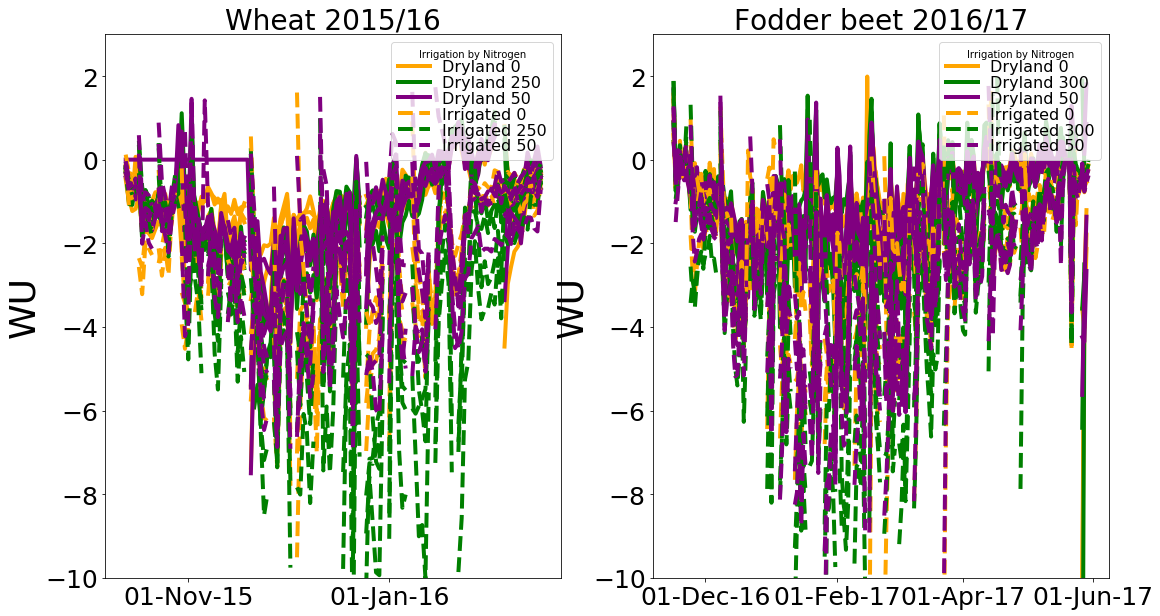

In [13]:
def AddGraphFeatures(Name):
    plt.ylabel('WU',fontsize=36);
    plt.ylim(-10,3)
    plt.tick_params(labelsize=25)
    plt.title(Name, fontsize=28);
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    labels, handles = GH.DedupLegendElements()
    ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05, 
                              title='Irrigation by Nitrogen')

Graph = plt.figure(figsize=(18,10))

ax = Graph.add_subplot(1,2,1)
GH.AddIndexedPlot(WU.loc[:,'Wheat'],ax,WheatGPs,4)
AddGraphFeatures('Wheat 2015/16')

ax = Graph.add_subplot(1,2,2)
GH.AddIndexedPlot(WU.loc[:,'Beat'],ax,BeatGPs,4)
AddGraphFeatures('Fodder beet 2016/17')

In [14]:
#Calculate aerodynamic temperature
To = pd.DataFrame(index = Rn.index,columns=Rn.columns)
for plot in To.columns:
    To.loc[:,plot] = Ts.loc[:,plot] + Ed.loc[To.index,('Expt','Expt','Expt')].values
    
#Calculate temperature difference
Td = pd.DataFrame(index = Rn.index,columns=Rn.columns)
for plot in Td.columns:
    Td.loc[:,plot] = To.loc[:,plot] - Ta.loc[To.index,('Expt','Expt','Expt')].values
    
#Calculate alpha
def AlphaCoeff(Td,fPAR):
    CoverFact = 0.1+1.6*fPAR
    if CoverFact > 1.0:
        CoverFact = 1.0
    return 1/(0.68 + 0.18*Td ) * CoverFact

Alpha = pd.DataFrame(index = Rn.index,columns=Rn.columns)
for plot in Alpha.columns:
    Alpha.loc[:,plot] = [AlphaCoeff(Td.loc[x,plot],
                                   fPAR.loc[x,plot]) for x in Alpha.index]

def estGDay(SoilRadn, AirTemp):
    Const = -0.7091
    SoilRadEff = np.multiply(SoilRadn.values,0.2149)
    AirTempEff = np.multiply(AirTemp.values,0.0736)
    return Const + SoilRadEff  + AirTempEff 

#Calculate G for each plot
G = pd.DataFrame(index=Rn.index, columns=Rn.columns)
for plot in G.columns:
    G.loc[:,plot] = estGDay(Rs.loc[To.index,('Expt','Expt','Expt')] * (1-fPAR.loc[To.index,plot]),
                            Ta.loc[To.index,('Expt','Expt','Expt')])
RnLessG = Rn - G

#Estimate Water Use by surfaces 
E = pd.DataFrame(index = Rn.index,columns=Rn.columns)
for plot in E.columns:
    E.loc[:,plot] = [et.Priestly_TaylorEO(RnLessG.loc[x,plot],
                                         Ta.loc[x,('Expt','Expt','Expt')],
                                         Alpha.loc[x,plot],
                                         'net') for x in E.index]

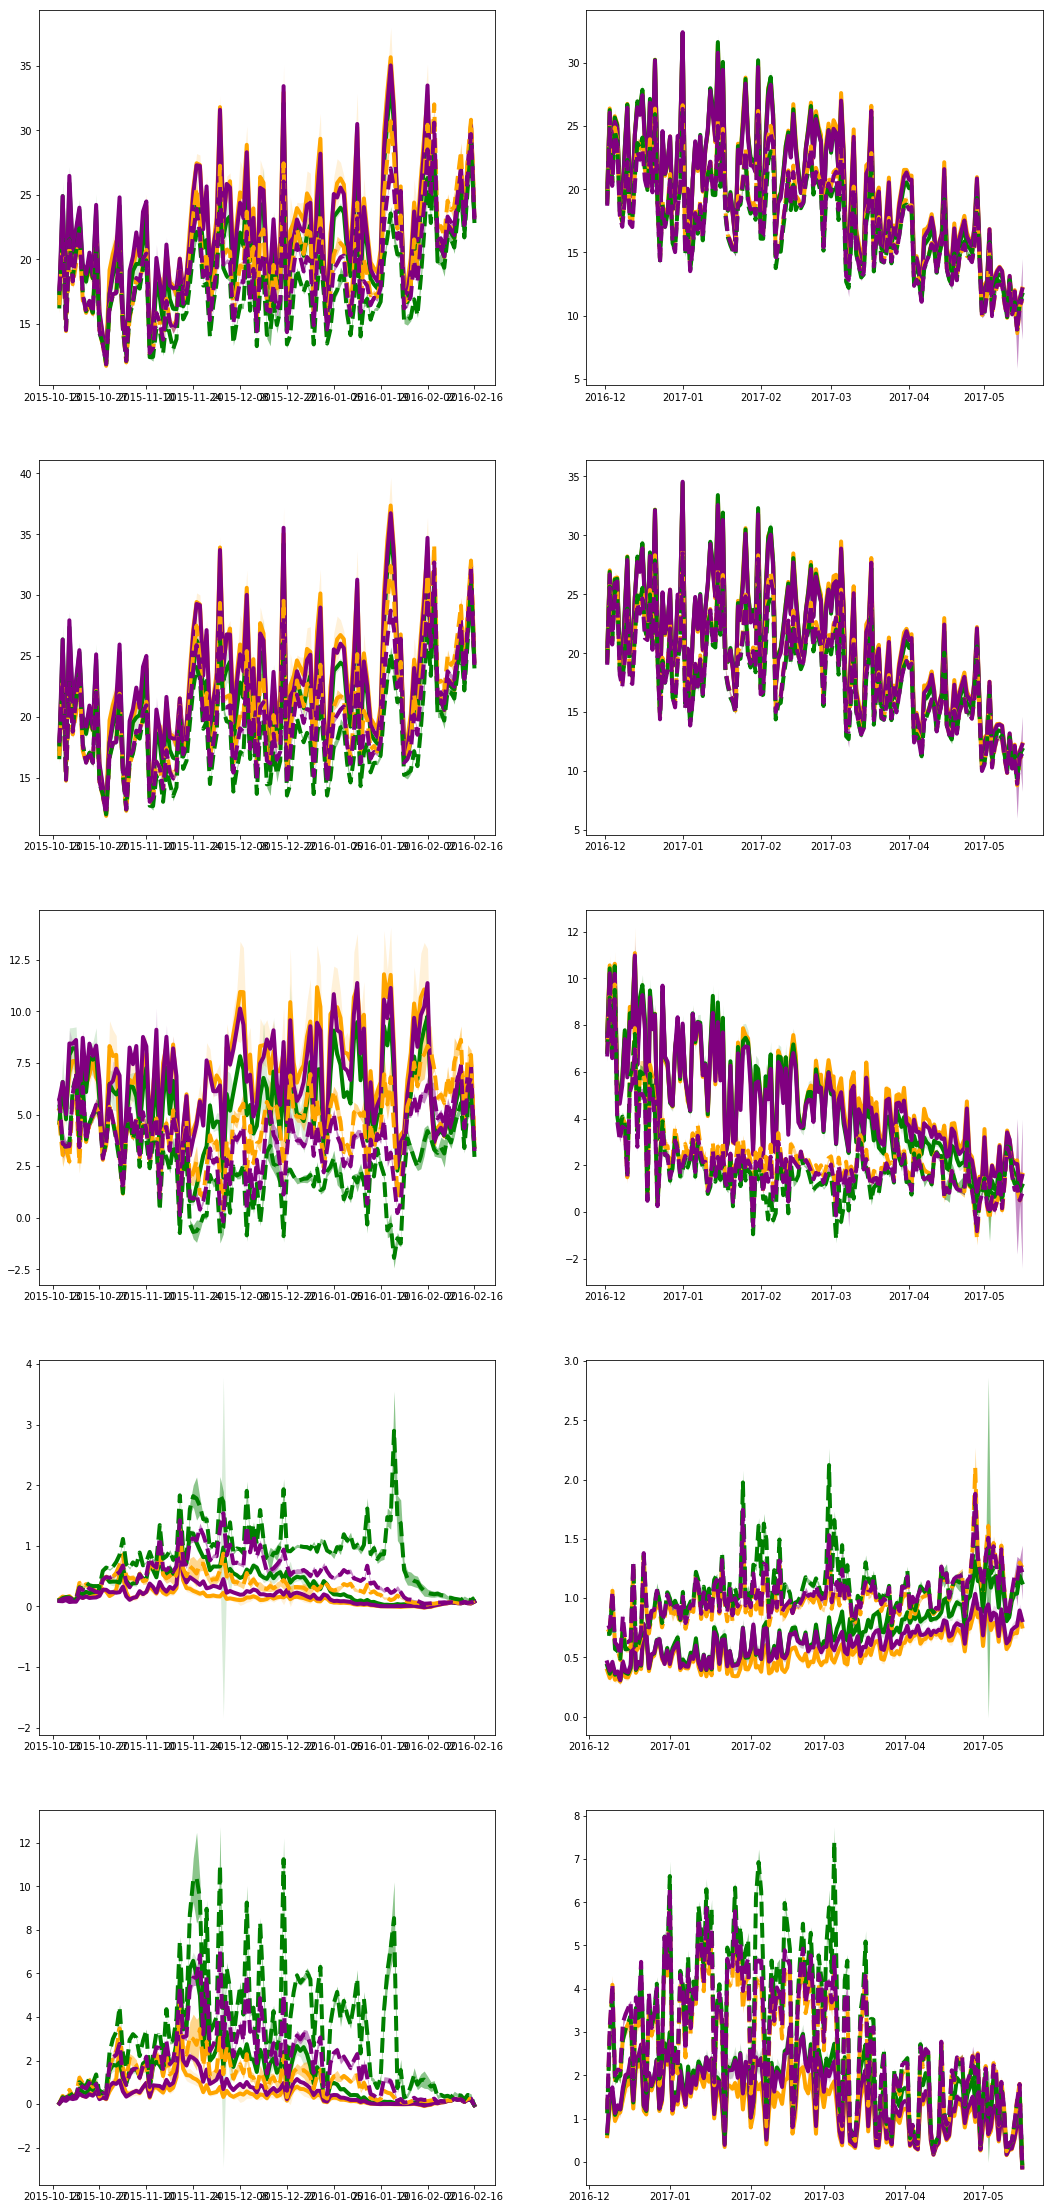

In [15]:
Graph = plt.figure(figsize=(18,40))

ax = Graph.add_subplot(5,2,1)
GH.AddIndexedPlotWithSEM(Ts.loc[:,'Wheat'],ax,WheatGPs,4)

ax = Graph.add_subplot(5,2,2)
GH.AddIndexedPlotWithSEM(Ts.loc[:,'Beat'],ax,BeatGPs,4)

ax = Graph.add_subplot(5,2,3)
GH.AddIndexedPlotWithSEM(To.loc[:,'Wheat'],ax,WheatGPs,4)

ax = Graph.add_subplot(5,2,4)
GH.AddIndexedPlotWithSEM(To.loc[:,'Beat'],ax,BeatGPs,4)

ax = Graph.add_subplot(5,2,5)
GH.AddIndexedPlotWithSEM(Td.loc[:,'Wheat'],ax,WheatGPs,4)

ax = Graph.add_subplot(5,2,6)
GH.AddIndexedPlotWithSEM(Td.loc[:,'Beat'],ax,BeatGPs,4)

ax = Graph.add_subplot(5,2,7)
GH.AddIndexedPlotWithSEM(Alpha.loc[:,'Wheat'],ax,WheatGPs,4)

ax = Graph.add_subplot(5,2,8)
GH.AddIndexedPlotWithSEM(Alpha.loc[:,'Beat'],ax,BeatGPs,4)

ax = Graph.add_subplot(5,2,9)
GH.AddIndexedPlotWithSEM(E.loc[:,'Wheat'],ax,WheatGPs,4)

ax = Graph.add_subplot(5,2,10)
GH.AddIndexedPlotWithSEM(E.loc[:,'Beat'],ax,BeatGPs,4)

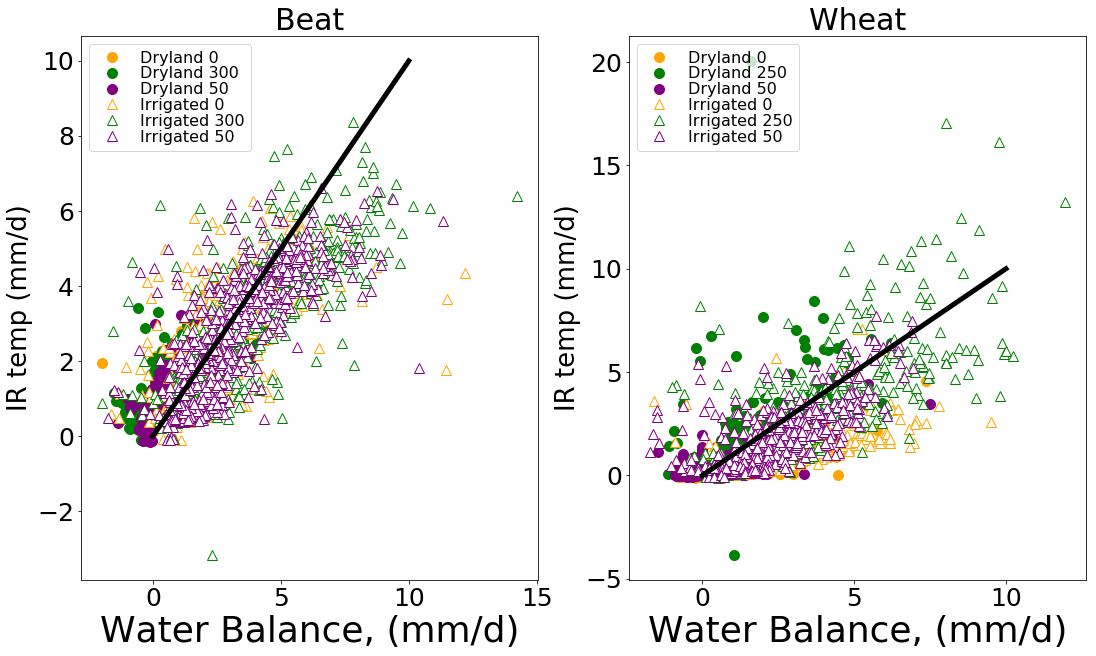

In [38]:
Graph = plt.figure(figsize=(18,10))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(1,2,pos)
        GH.AddIndexedXY(-WU.reindex(E.index).loc[:,crop],
                        E.loc[:,crop],
                        ax,globals()[crop+'GPs'], 10)
        plt.plot([0,10],[0,10],'k',lw=5)
        plt.xlabel('Water Balance, (mm/d)',fontsize=36)
        plt.ylabel('IR temp (mm/d)',fontsize=26)
        plt.tick_params(labelsize=25)
        plt.title(crop,fontsize=30)
        labels, handles = GH.DedupLegendElements()
        ledg = plt.legend(labels, handles,loc=2,numpoints=1,fontsize = 16,labelspacing = 0.05)
        ledg.get_title().set_fontsize(20)
        pos +=1
    